# Анализ гипотез для увеличения выручки интернет-магазина, проведение A/B-теста и оценка его результатов

**Описание:**

Крупный интернет-магазин планирует повысить выручку. Для этого нужно приотезировать гипотезы, которые имеются у магазина, а также запустить и анализировать A/B-тест.

**Цель:**

- Приоритизировать гипотезы;
- запустить A/B-тест;
- проанализировать результаты. 

**Этапы работы:**

**Часть 1**

1) Изучить и подготовить данные.
2) Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3) Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
4) Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, причины.

**Часть 2**

1) Изучить и подготовить данные.
2) Проанализировать A/B-тест.
3) Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
4) Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
5) Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
6) Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
7) Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
8) Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
9) Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
10) Построить точечный график стоимостей заказов. Сделать выводы и предположения.
11) Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
12) Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
13) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
14) Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
15) Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
16) Принять решение по результатам теста и объяснить его.

In [1]:
import pandas as pd
from scipy import stats as st
import scipy.stats as stats
import math as mth
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Часть 1

**Изучим и подготовим данные:**

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датасете с гипотезами Data не обнаружено нулевых значений. Содержимое колонок имеет корректный формат данных.

Ниже для удобства переименуем названия столбцов:

In [4]:
data = data.rename(
    columns={
        "Hypothesis": "hypothesis", 
        "Reach": "reach", 
        "Impact": "impact", 
        "Confidence": "confidence",
        "Efforts": "efforts"
    }
)

Далее приступим к приоретизации гипотез.

## Фреймворк ICE для приоритизации гипотез

ICE (от англ. impact, confidence, effort/ ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач.

Фреймворк ICE состоит из 3 компонент:
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

In [5]:
pd.options.display.max_colwidth = 150

data['ICE'] = round((data['impact'] * data['confidence'])/data['efforts'], 2)

display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По методу ICE наиболее перспективными гипотезами являются следующие гипотезы: 

- **8** - Запустить акцию, дающую скидку на товар в день рождения;
- **0** - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- **7** - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

## Фреймворк RICE для приоритизации гипотез

Фреймворк RICE состоит из четырёх компонент: impact, confidence, effort/ ease, reach.

Фреймворк RICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

In [6]:
pd.options.display.max_colwidth = 150

data['RICE'] = round((data['reach'] * data['impact'] * data['confidence'])/data['efforts'], 2)

display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методу RICE наиболее перспективными гипотезами являются: гипотеза 7, 2, 0.

По методу ICE наиболее перспективными гипотезами являются следующие гипотезы: 

- **7** - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- **2** - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- **0** - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

## Изменение приоритизации гипотез при применении RICE вместо ICE

При применении RICE в топе-3 гипотез по-прежнему остались гипотеза 7 и гипотеза 0.  

- **7** - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- **0** - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Однако лидирующая при ICE гипотеза 8 при RICE набрала всего 16.2 балла из-за низкого параметра Reach.

In [7]:
pd.options.display.max_colwidth = 150

data

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


# Часть 2. Анализ A/B-теста

## Предобработка данных

Изучим и подготовим данные о заказах orders и данные о пользователях visitors.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
orders.isna().count()

transactionId    1197
visitorId        1197
date             1197
revenue          1197
group            1197
dtype: int64

In [12]:
visitors.isna().count()

date        62
group       62
visitors    62
dtype: int64

В датасетах не обнаружено нулевых значений. Содержимое колонок date имеет некорректный формат данных.

In [13]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [14]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Приведем данные с датой к соответствующему типу:

In [15]:
orders['date'] = orders['date'].astype("datetime64[ns]")

In [16]:
visitors['date'] = visitors['date'].astype("datetime64[ns]")

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь данные имеют корректный формат.

Далее удостоверимся, что в датафреймах нет дубликатов:

In [19]:
orders.duplicated(keep=False).count()

1197

In [20]:
visitors.duplicated(keep=False).count()

62

Приведем названия столбцов к нижнему регистру:

In [21]:
orders = orders.rename(
    columns={
        "transactionId": "transaction_id", 
        "visitorId": "visitor_id"
    }
)

In [22]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Изучим числовые данные столбцы revenue на наличие аномалий:

<Figure size 1080x720 with 0 Axes>

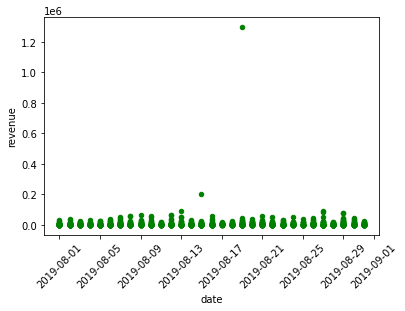

In [23]:
plt.figure(figsize=(15,10))
orders.plot.scatter(x = 'date', y = 'revenue', c='green')
plt.xticks(rotation=45)
plt.show();

In [24]:
orders['revenue'].max()

1294500

In [25]:
orders['revenue'].min()

50

In [26]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [27]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [28]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [29]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

Перед нами данные за период с 1 по 31 августа 2019 года.

В данных столбца revenue из датафрейма orders имеются некоторые аномалии - это мы изучим чуть позднее.

In [30]:
users_a = orders[orders['group']=='A']
users_b = orders[orders['group']=='B']
users_dublicate = users_a.merge(users_b, on='visitor_id', how='inner')
users_dublicate['visitor_id'].nunique()

58

In [31]:
users_a.groupby('visitor_id')['visitor_id'].count()

visitor_id
8300375       1
11685486      1
54447517      1
66685450      1
78758296      1
             ..
4243832526    1
4256040402    7
4259830713    1
4266935830    1
4278982564    1
Name: visitor_id, Length: 503, dtype: int64

In [32]:
users_b.groupby('visitor_id')['visitor_id'].count()

visitor_id
5114589       1
6958315       1
8300375       1
39475350      1
47206413      1
             ..
4258103007    1
4266935830    1
4279090005    1
4281247801    1
4283872382    1
Name: visitor_id, Length: 586, dtype: int64

In [33]:
users_dublicate

,transaction_id_x,visitor_id,date_x,revenue_x,group_x,transaction_id_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


**Проверим есть ли дубликаты в заказах:**

In [34]:
users_a.groupby('transaction_id')['visitor_id'].count()

transaction_id
1062393       1
7210578       1
8131427       1
26423654      1
35929812      1
             ..
4276811111    1
4279408906    1
4281129020    1
4288552432    1
4293855558    1
Name: visitor_id, Length: 557, dtype: int64

In [35]:
users_b.groupby('transaction_id')['visitor_id'].count()

transaction_id
4919758       1
11068804      1
19446369      1
19467429      1
29438557      1
             ..
4230875336    1
4238948438    1
4244481880    1
4252514150    1
4261512099    1
Name: visitor_id, Length: 640, dtype: int64

In [36]:
orders_dublicate = users_a.merge(users_b, on='transaction_id', how='inner')
orders_dublicate['transaction_id'].nunique()

0

Заказов-дубликатов по двум группам не обнаружено.

**Проверка показала:**

- В группе A - 503 уникальных пользователя;
- В группе B - 586 уникальных пользователей;
- 183 записи с дублирующимися пользователями, из которых 58 пользователей - уникальные пользователи, которые по каким-то критериям попали в обе группы;
- Заказов-дубликатов, попапавших в обе группы, не найдено.

**Результаты подготовки данных orders и visitors:**

- установлено, что в датафреймах нет пропусков и дубликатов;
- данные представлены за август 2019 года;
- данные с датой приведены к соответствующему типу;
- названия столбцов приведены к нижнему регистру;
- в поле revenue имеются аномальные значения;
- 58 пользователей - уникальные пользователи, которые по каким-то критериям попали в обе группы.

## График кумулятивной выручки по группам. Выводы и предположения

Найдем и посчитаем записи-дубликаты по дате и группе::

In [37]:
orders[['date','group']].duplicated().sum()

1135

Теперь создадим массив уникальных пар значений дат и групп теста:

In [38]:
dates_groups = orders[['date','group']].drop_duplicates()

In [39]:
dates_groups[['date','group']].duplicated()

0       False
2       False
45      False
47      False
55      False
        ...  
1068    False
1114    False
1116    False
1149    False
1150    False
Length: 62, dtype: bool

Получим агрегированные кумулятивные по дням данные о заказах:

In [40]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], 
        orders['group'] == x['group']
    )
                    ].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transaction_id' : 'nunique', 
         'visitor_id' : 'nunique', 
         'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [41]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group']
    )
                      ].agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

Объединим кумулятивные данные в одной таблице и переименуем столбцы: 

In [42]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и в группе B:

In [43]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

Построим график кумулятивной выручки по группам:

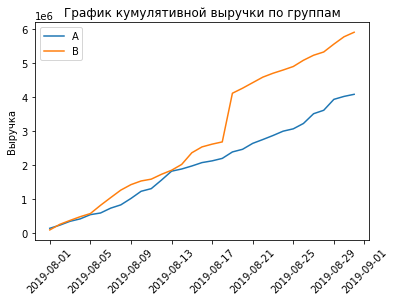

In [44]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.ylabel("Выручка")
plt.title("График кумулятивной выручки по группам")
plt.legend()
plt.xticks(rotation=45)
plt.show();

**Вывод:**

Выручка по группе A равномерно увеличивается в течение всего теста. 
Однако график выручки группы B в нескольких точках резко возрастает. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

## График кумулятивного среднего чека по группам. Выводы и предположения

Построим график кумулятивного среднего чека по группам:

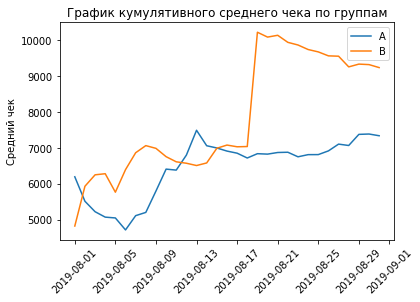

In [45]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.ylabel("Средний чек")
plt.title("График кумулятивного среднего чека по группам")
plt.legend()
plt.xticks(rotation=45)
plt.show();

**Вывод:**

Для группы A средний чек становится равномерным ближе к концу теста. Для группы B к концу теста наблюдется резкий всплеск на графике - возможно, в группу B во второй половине теста попали крупные заказы. Тогда, чтобы прийти к реальному среднему чеку и установиться на его уровне - для этой группы нужно больше данных.

## График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения

Собираем данные по кумулятивной выручке по группам в один датафрейм:

In [46]:
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

Строим график относительного изменения кумулятивного среднего чека группы B к группе A:

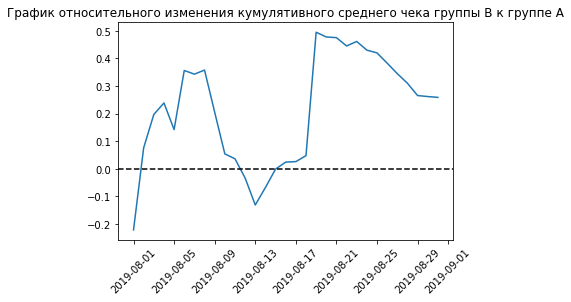

In [47]:
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xticks(rotation=45)
plt.show();

**Вывод:**

Как мы видим, в нескольких точках график различия между двумя группами резко «скачет». Это свидетельствует о том, что в данных могут быть аномально крупные заказы и выбросы. 

## График кумулятивного среднего количества заказов на посетителя по группам.  Выводы и предположения

Посчитаем кумулятивную конверсию:

In [48]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

Разделим данные о кумулятивной конверсии по группам:

In [49]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

Построим графики кумулятивного количества заказов на посетителя по группам:

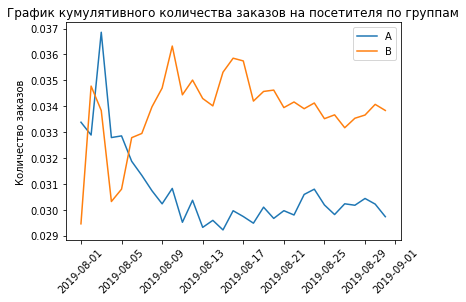

In [50]:
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.ylabel("Количество заказов")
plt.title("График кумулятивного количества заказов на посетителя по группам")
plt.legend()
plt.xticks(rotation=45)
plt.show();

**Вывод:**

По группе А кумулятивное количество заказов к концу теста стабилизируется на уровне 0.030. По группе B этот показатель лучше - здесь количество заказов на посетителя стабилизируется на уровне 0.034.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения

Собираем данные по кумулятивной конверсии по группам в один датафрейм:

In [51]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

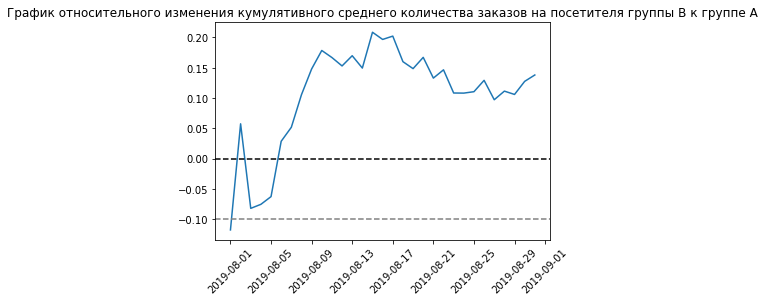

In [52]:
plt.plot(
    merged_cumulative_conversions['date'], 
    merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A")
plt.xticks(rotation=45)
plt.show();

**Вывод:**

Сначала группа B уступала группе A по количеству заказов на посетителя, а потом резко вырвалась вперед и продолжает сохранять лидерство до конца теста.

## Точечный график количества заказов по пользователям. Выводы и предположения

Сгрупируем данные по пользователям и посчитаем заказы, размещенные каждым пользователем:

In [53]:
orders_by_user = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_user.columns = ['visitor_id', 'orders']

orders_by_user.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


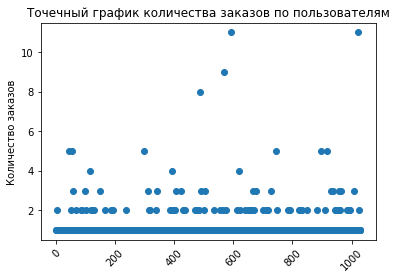

In [54]:
x_values = pd.Series(range(0,len(orders_by_user)))

plt.scatter(x_values, orders_by_user['orders']) 
plt.ylabel("Количество заказов")
plt.title("Точечный график количества заказов по пользователям")
plt.xticks(rotation=45)
plt.show();

**Выводы:**

Судя по графику, большинство пользователей делают 1-2 заказа. Однако на графике есть пользователи, которые сделали больше 8 заказов - пока непонятно, являются ли они аномалиями или нет.

## 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей

In [55]:
display('95-ый перцентиль: %.2f' % (np.percentile(orders_by_user['orders'], [95])))
display('99-ый перцентиль: %.2f' % (np.percentile(orders_by_user['orders'], [99])))

'95-ый перцентиль: 2.00'

'99-ый перцентиль: 4.00'

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей сделали 4 и более заказов.

Разумно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и избавиться от аномальных пользователей по ней.

In [56]:
abnormal_quantity = orders_by_user.query('orders >= 4')['visitor_id'].to_list()
abnormal_quantity

[199603092,
 237748145,
 457167155,
 1230306981,
 1614305549,
 2038680547,
 2378935119,
 2458001652,
 2587333274,
 3062433592,
 3717692402,
 3803269165,
 4256040402]

## Точечный график стоимостей заказов. Выводы и предположения

Построим точечный график стоимостей заказов:

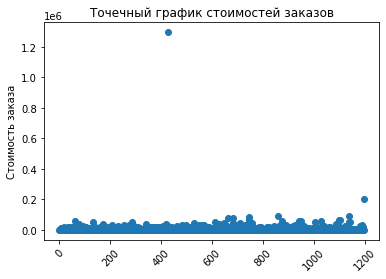

In [57]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.ylabel("Стоимость заказа")
plt.title("Точечный график стоимостей заказов")
plt.xticks(rotation=45)
plt.show();

**Выводы:**

На графике имеются два выброса - позднее определим их точно и избавимся от них.

##  95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов

In [58]:
display('95-ый перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
display('99-ый перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

'95-ый перцентиль: 28000.00'

'99-ый перцентиль: 58233.20'

Не более 5% заказов дороже 28000.00 рублей и не более 1% дороже 58233.20 рублей. Все, что дороже 58233.20 рублей - аномалия.

## Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения

Подготовим данные для проведения статистического теста:

In [59]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [60]:
orders_per_group = orders.groupby('group').agg({'transaction_id': 'count'})
orders_per_group

,transaction_id
group,
A,557
B,640


In [61]:
total_visitors = visitors.groupby('group').agg({'visitors': 'sum'})
total_visitors

,visitors
group,
A,18736
B,18916


In [62]:
orders_per_group = orders_per_group.merge(total_visitors, on='group', how='left').reset_index()
orders_per_group

,group,transaction_id,visitors
0,A,557,18736
1,B,640,18916


In [63]:
orders_per_group['conversion'] = round(orders_per_group['transaction_id']/orders_per_group['visitors'], 3)
orders_per_group

,group,transaction_id,visitors,conversion
0,A,557,18736,0.030
1,B,640,18916,0.034


**Для проверки гипотезы о равенстве долей применем Z-критерий:**

**H0:** Статистически значимых отличий в среднем количестве заказов между группами нет.\
**H1:** Статистически знаяимые отличия между средним количеством заказов между группами есть.

In [64]:
alpha = 0.05

transactions = orders_per_group['transaction_id']
visitors = orders_per_group['visitors']

p1 = transactions[0]/visitors[0]

p2 = transactions[1]/visitors[1]

p_combined = (transactions[0] + transactions[1]) / (visitors[0] + visitors[1])

difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/visitors[0] + 1/visitors[1]))

distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:**

Значение pvalue гораздо меньше 0.05, поэтому мы отвергаем нулевую гипотезу. Анализ «сырых данных» показывает, что среднее количество заказов на постетителя в группе A значимо отличается от среднего количества заказов на постетителя в группе B. 
Далее необходимо сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения

Поскольку в данных по выручке есть большие выбросы воспользуемся непараметрическим тестом Уилкоксона-Манна-Уитни.

**Для проверки гипотезы о равенстве долей Непараметрический тест Уилкоксона-Манна-Уитни:**

**H0:** Средний чек заказа в группе A равен среднему чеку заказа в группе B\
**H1:** Средний чек заказа в группе A не равен среднему чеку заказа в группе B

In [65]:
alpha = 0.05
orders_group_a = orders[orders['group']=='A']['revenue']
orders_group_b = orders[orders['group']=='B']['revenue']

results = st.mannwhitneyu(orders_group_a, orders_group_b)

pvalue = results.pvalue

print('p-значение: ', pvalue)

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод:**

P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет.

In [66]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [67]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения

Подготовим очищенные данные по количеству заказов на пользователя:

In [68]:
orders_filtered = orders[~orders['visitor_id'].isin(abnormal_quantity)]
orders_filtered

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [69]:
orders_per_group_filtered = orders_filtered.groupby('group').agg({'transaction_id': 'count'})
orders_per_group_filtered

,transaction_id
group,
A,517
B,599


In [70]:
orders_per_group_filtered = orders_per_group_filtered.merge(total_visitors, on='group', how='left').reset_index()
orders_per_group_filtered

,group,transaction_id,visitors
0,A,517,18736
1,B,599,18916


In [71]:
orders_per_group_filtered['conversion'] = orders_per_group_filtered['transaction_id'] / orders_per_group_filtered['visitors']

In [72]:
orders_per_group_filtered

,group,transaction_id,visitors,conversion
0,A,517,18736,0.027594
1,B,599,18916,0.031666


**Для проверки гипотезы о равенстве долей применем Z-критерий:**

**H0:** Среднее количество заказов на постетителя в группе A равно среднему количеству заказов на постетителя в группе B\
**H1:** Среднее количество заказов на постетителя в группе A не равно среднему количеству заказов на постетителя в группе B

In [73]:
alpha = 0.05

transactions = orders_per_group_filtered['transaction_id']
visitors = orders_per_group_filtered['visitors']

p1 = transactions[0]/visitors[0]

p2 = transactions[1]/visitors[1]

p_combined = (transactions[0] + transactions[1]) / (visitors[0] + visitors[1])

difference = p1 - p2 

z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/visitors[0] + 1/visitors[1]))

distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.019821291468021807
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод:**

Значение pvalue гораздо меньше 0.05, поэтому мы отвергаем нулевую гипотезу. Анализ «очищенных данных» также показывает, что среднее количество заказов на постетителя в группе A значимо отличается от среднего количества заказов на постетителя в группе B. 

Таким образом конверсия в группе B значимо выше конверсии в группе A.

## Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения

Очистим данные от аномально крупных по сумме заказов:

In [74]:
filtered_revenue =orders.query('revenue <= 58233')

**Для проверки гипотезы о равенстве долей Непараметрический тест Уилкоксона-Манна-Уитни:**

**H0:** Средний чек заказа в группе A равен среднему чеку заказа в группе B\
**H1:** Средний чек заказа в группе A не равен среднему чеку заказа в группе B

In [75]:
alpha = 0.05

orders_group_a = filtered_revenue[filtered_revenue['group']=='A']['revenue']
orders_group_b = filtered_revenue[filtered_revenue['group']=='B']['revenue']

results = st.mannwhitneyu(orders_group_a, orders_group_b, use_continuity=True)

pvalue = results.pvalue

print('p-значение: ', pvalue)

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.6208626966847455
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


**Вывод:**

P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами снова нет.

In [76]:
filtered_revenue[filtered_revenue['group']=='A']['revenue'].mean()

6470.587272727273

In [77]:
filtered_revenue[filtered_revenue['group']=='B']['revenue'].mean()

6592.692913385827

## Общий вывод по A/B тесту

Анализ «очищенных данных» показал:
- P-value гораздо меньше 0.05, что означает среднее количество заказов на постетителя в группе A значимо отличается от среднего количества заказов на постетителя в группе B. Таким обазом, конверсия в группе B значимо выше конверсии в группе A.
- P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами снова нет.

Как и по "сырым данным" конверсия в группе B значительно лучше, чем в группе A.

**Исходя из достигнутых результатов, тест следовало бы остановить и признать его успешным, поскольку при имеющихся данных сегмент B статистически значимо лучше сегмента A.**

## Вывод

**Результаты работы:**

- Изучена общая информация об имеющихся данных, проведена предобработка;
- проведена приоретизация гипотез по фреймворку ICE и RICE; 
- запущен и проанализирован A/B-тест;
- составлен общий вывод по A/B-тесту.

**Приоретизация гипотез показала:**

- По методу ICE наиболее перспективными гипотезами по увеличению выручки являются: гипотеза 8, 0, 7. По методу RICE наиболее перспективными гипотезами являются: гипотеза 7, 2, 0.

**Анализ A/B-теста позволил нам сделать следующие выводы:**
- Выручка по группе A равномерно увеличивается в течение всего теста. Однако график выручки группы B в нескольких точках резко возрастает. Для группы A средний чек становится равномерным ближе к концу теста. Для группы B к концу теста наблюдается резкий всплеск на графике. График относительного изменения кумулятивного среднего чека группы B к группе A а конце теста стабилизруется на положительному значении.
- По группе А кумулятивное количество заказов к концу теста стабилизируется на уровне 0.030. По группе B этот показатель лучше - здесь количество заказов на посетителя стабилизируется на уровне 0.034. Сначала группа B уступала группе A по количеству заказов на посетителя, а потом резко вырвалась вперед и продолжает сохранять лидерство до конца теста. Большинство пользователей делают 1-2 заказа.
- Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей сделали 4 и более заказов. Не более 5% заказов дороже 28000.00 рублей и не более 1% дороже 58233.20 рублей. Все, что дороже 58233.20 рублей - аномалия.
- Статистический анализ (непараметрический тест Уилкоксона-Манна-Уитни), как по сырым, так и по очищенным данным показал, что статистически значимых отличий в среднем чеке между группами нет.
- Статистический анализ (z-критерий), как по сырым, так и по очищенным данным показал, что конверсия в группе B статистически значимо лучше конверсии в группе A, что позволяет признать тест состоятельным и зафиксировать победу группы B.